In [32]:
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [33]:
df = pd.read_csv("/datc/opschaler/combined_gas_smart_weather_dfs/processed/all_dwellings_combined_hour.csv",header=0,delimiter="\t")

In [36]:
df = df.set_index(pd.DatetimeIndex(df['datetime']))
df.drop(['datetime'], axis=1)
df.head()

,datetime,eMeter,eMeterReturn,eMeterLow,eMeterLowReturn,ePower,ePowerReturn,gasMeter,DD,DR,...,RG,SQ,T,T10,TD,U,VV,WW,dwelling,gasPower
datetime,,,,,,,,,,,,,,,,,,,,,
2017-03-07 15:00:00,2017-03-07 15:00:00,NaN,NaN,NaN,NaN,NaN,NaN,307.44101,305.450012,0.0,...,0.0,7.631617,8.733334,9.133333,4.883333,76.500000,31916.666016,1.333333,P01S01W7548,NaN
2017-03-07 16:00:00,2017-03-07 16:00:00,625.401001,0.0,359.501007,0.0,383.994446,0.0,307.44101,288.200012,0.0,...,0.0,10.000000,9.116667,10.750000,5.416667,77.166664,23800.000000,2.666667,P01S01W7548,0.0
2017-03-07 17:00:00,2017-03-07 17:00:00,625.679993,0.0,359.501007,0.0,277.722229,0.0,307.44101,285.866669,0.0,...,0.0,2.936100,7.866667,8.450000,4.550000,78.833336,22233.333984,1.000000,P01S01W7548,0.0
2017-03-07 18:00:00,2017-03-07 18:00:00,625.820984,0.0,359.501007,0.0,143.624283,0.0,307.44101,286.633331,0.0,...,0.0,5.000000,7.066667,6.816667,4.433333,82.833336,20266.666016,2.500000,P01S01W7548,0.0
2017-03-07 19:00:00,2017-03-07 19:00:00,625.963013,0.0,359.501007,0.0,143.376038,0.0,307.44101,278.783325,0.0,...,0.0,0.000000,6.616667,6.016667,4.300000,84.666664,17433.333984,2.833333,P01S01W7548,0.0


# Quick EDA

In [41]:
#creating correlation matrix function
def corr_matrix (data):

    #initialising correlations
    corr = data.corr()

    #creating a mask for corr matrix
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    return sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})



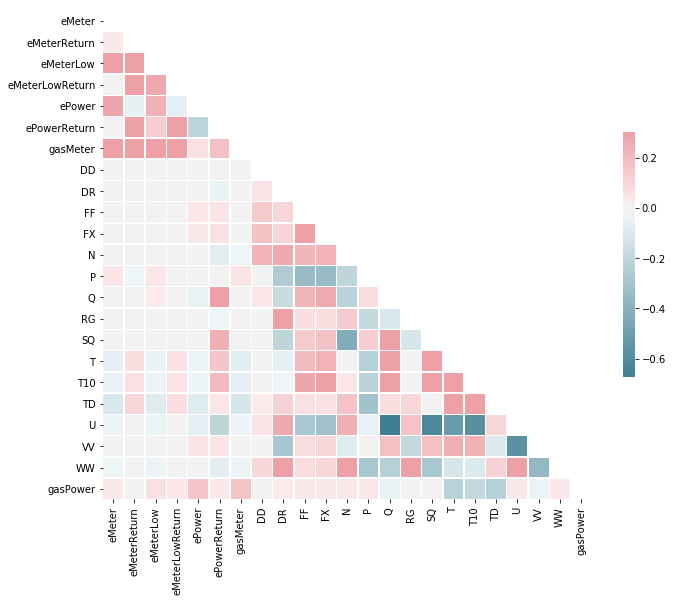

In [42]:
corr_matrix(df)

In [43]:
#resampling data to day to see differences
df_d = df.resample('d').mean()

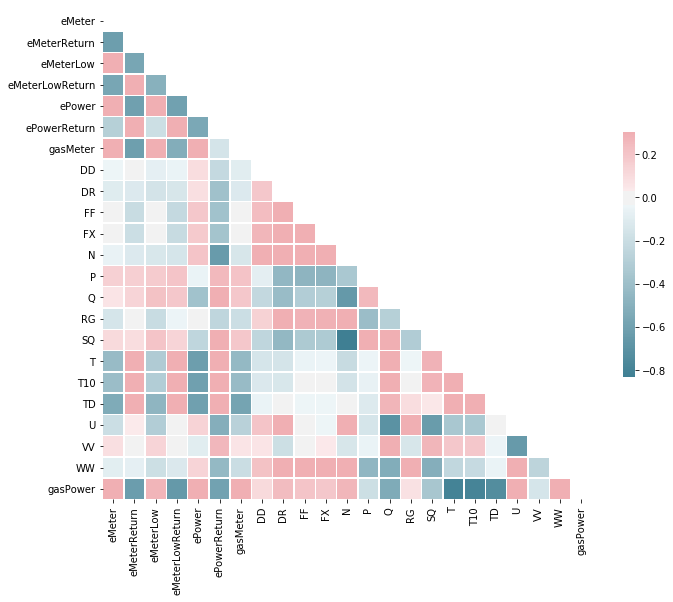

In [44]:
corr_matrix(df_d)

# Creating LR model

In [48]:
#creating variables for LR
x = df['T']
y = df['gasPower']

#initialising variables for lineair function
a = tf.Variable(1.0)
b = tf.Variable(0.2)

#creating the function
y = a * x + b